<a href="https://colab.research.google.com/github/yp6969/Inro_to_DL/blob/main/OneNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/PeizeSun/OneNet.git

Cloning into 'OneNet'...
remote: Enumerating objects: 677, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 677 (delta 48), reused 48 (delta 48), pack-reused 625
Receiving objects: 100% (677/677), 1.53 MiB | 20.29 MiB/s, done.
Resolving deltas: 100% (185/185), done.


In [1]:
cd OneNet

/content/OneNet


#  installing torchvison according to your cuda version

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [3]:
pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


# restart runtime after installing

In [4]:
!pip install pyyaml==5.1 pycocotools>=2.0.1

In [5]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.7.1+cu101 True


# install onenet

In [6]:
!python setup.py build develop

running build
running build_py
running build_ext
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:352: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
running develop
running egg_info
writing detectron2.egg-info/PKG-INFO
writing dependency_links to detectron2.egg-info/dependency_links.txt
writing requirements to detectron2.egg-info/requires.txt
writing top-level names to detectron2.egg-info/top_level.txt
adding license file 'LICENSE'
writing manifest file 'detectron2.egg-info/SOURCES.txt'
running build_ext
copying build/lib.linux-x86_64-3.7/detectron2/_C.cpython-37m-x86_64-linux-gnu.so -> detectron2
Creating /usr/local/lib/python3.7/dist-packages/detectron2.egg-link (link to .)
detectron2 0.3 is already the active version in easy-install.pth

Installed /content/OneNet
Processing dependencies for detectron2==0.3
Sear

# link coco datset to OneNet dateset folder
## download COCO dataset and then link the folder with OneNet

In [ ]:
!mkdir -p datasets/coco
!ln -s path/to/coco/ datasets/coco/annotations
!ln -s path/to/coco/ datasets/coco/train2017
!ln -s path/to/coco/ datasets/coco/val2017

In [26]:
pip install -U iopath

# train ONeNet

In [13]:
!python /content/OneNet/projects/OneNet/train_net.py --num-gpus 1 \
    --config-file /content/OneNet/projects/OneNet/configs/onenet.res50.dcn.yaml

Command Line Args: Namespace(config_file='/content/OneNet/projects/OneNet/configs/onenet.res50.dcn.yaml', dist_url='tcp://127.0.0.1:49152', eval_only=False, machine_rank=0, num_gpus=1, num_machines=1, opts=[], resume=False)
[05/10 21:04:10 detectron2]: Rank of current process: 0. World size: 1
[05/10 21:04:10 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------
sys.platform            linux
Python                  3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
numpy                   1.21.6
detectron2              0.3 @/content/OneNet/detectron2
Compiler                GCC 7.5
CUDA compiler           CUDA 11.1
detectron2 arch flags   7.5
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.1+cu101 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0                   Tesla T4 (arch=7.5)
CUDA_HOME               /usr/local/cuda
Pillow                  

# Evaluate

In [14]:
!python projects/OneNet/train_net.py --num-gpus 1 \
    --config-file projects/OneNet/configs/onenet.res50.dcn.yaml \
    --eval-only MODEL.WEIGHTS model_onenet_r50dcn.pth

Command Line Args: Namespace(config_file='projects/OneNet/configs/onenet.res50.dcn.yaml', dist_url='tcp://127.0.0.1:49152', eval_only=True, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', 'model_onenet_r50dcn.pth'], resume=False)
[05/10 21:05:57 detectron2]: Rank of current process: 0. World size: 1
[05/10 21:05:58 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------
sys.platform            linux
Python                  3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
numpy                   1.21.6
detectron2              0.3 @/content/OneNet/detectron2
Compiler                GCC 7.5
CUDA compiler           CUDA 11.1
detectron2 arch flags   7.5
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.1+cu101 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0                   Tesla T4 (arch=7.5)
CUDA_HOME               /usr/local/cuda

# Visualize
install opencv additinoally for visualize

In [32]:
!python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res50.dcn.yaml \
    --input /content/images/* --output /content/output_result --confidence-threshold 0.4 \
    --opts MODEL.WEIGHTS model_onenet_r50dcn.pth

[05/10 21:21:47 detectron2]: Arguments: Namespace(confidence_threshold=0.4, config_file='projects/OneNet/configs/onenet.res50.dcn.yaml', input=['/content/images/banana.jpg', '/content/images/person.jpg', '/content/images/plane.jpg'], opts=['MODEL.WEIGHTS', 'model_onenet_r50dcn.pth'], output='/content/output_result', video_input=None, webcam=False)
[05/10 21:21:50 fvcore.common.checkpoint]: [Checkpointer] Loading from model_onenet_r50dcn.pth ...
  0% 0/3 [00:00<?, ?it/s][05/10 21:21:51 detectron2]: /content/images/banana.jpg: detected 2 instances in 0.18s
 33% 1/3 [00:00<00:00,  2.04it/s][05/10 21:21:51 detectron2]: /content/images/person.jpg: detected 1 instances in 0.15s
 67% 2/3 [00:00<00:00,  2.36it/s][05/10 21:21:52 detectron2]: /content/images/plane.jpg: detected 1 instances in 0.13s
100% 3/3 [00:01<00:00,  2.65it/s]


Display results

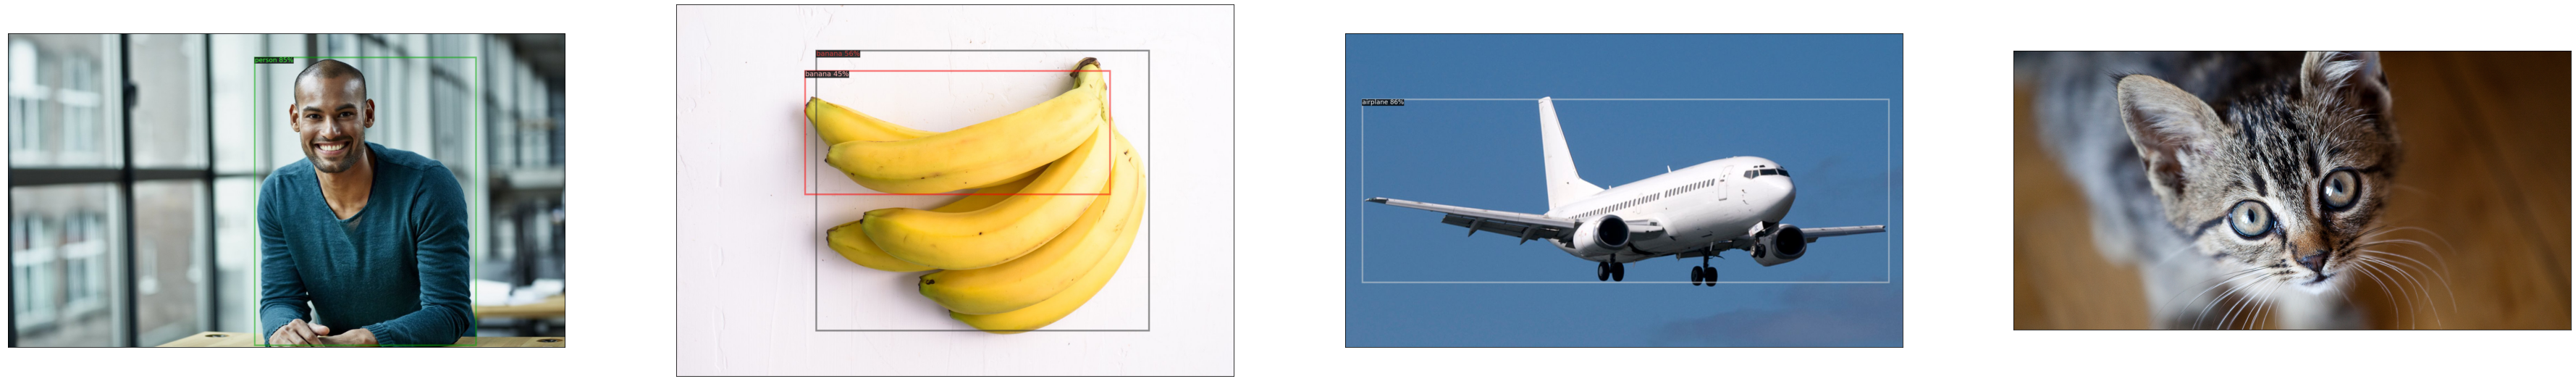

In [33]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('/content/output_result/*'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(80,60))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])